In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
np.random.seed(42)
date_rng = pd.date_range(start='2000-01-01', periods=100, freq='M')
trend = np.linspace(10, 50, 100)
noise = np.random.normal(0, 2, 100)
values = trend + seasonality + noise

<ipython-input-3-e8ae02006935>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2000-01-01', periods=100, freq='M')


In [4]:
data = pd.DataFrame({'Date': date_rng, 'Value': values})
data.set_index('Date', inplace=True)

In [5]:
rolling_mean = data['Value'].rolling(window=12).mean()
rolling_std = data['Value'].rolling(window=12).std()


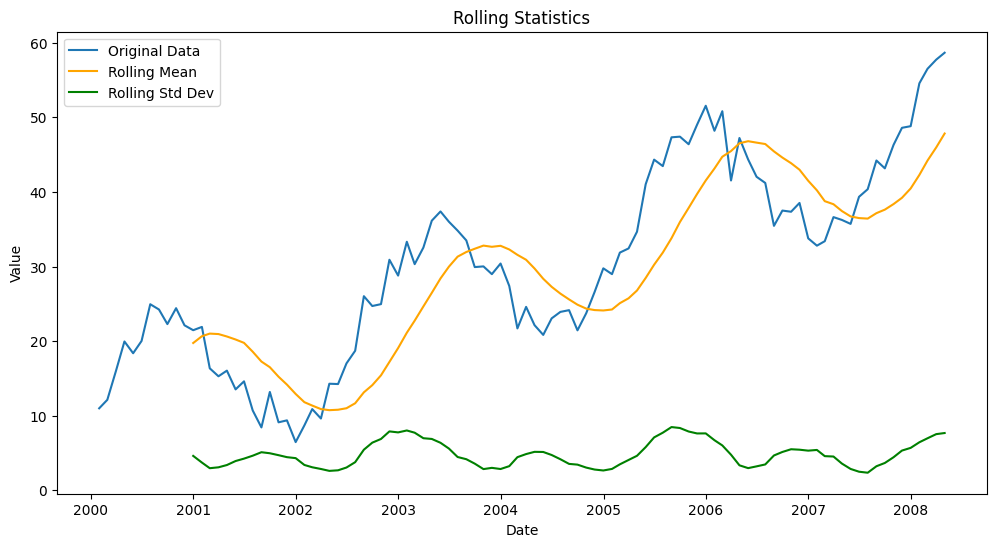

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Value'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
def adf_test(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey-Fuller Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

adf_test(data['Value'])

Augmented Dickey-Fuller Test:
ADF Statistic: -0.48356417880807095
p-value: 0.8951841266467454
Critical Values:
	1%: -3.506057133647011
	5%: -2.8946066061911946
	10%: -2.5844100201994697
